In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [2]:
data = pd.read_csv('C:/Users/Константин/Pyton/stud_math.xls')

In [3]:
display(data)
data.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [4]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Цель анализа - подготовить данные для построения модели, предсказывающей результаты экзамена.
Задачи анализа - определить взаимосвязь результатов зкзамена с другими переменными. 
'score' - целевая переменная.
Произведена классификация переменных по двум основаниям:
- по типу данных (строковые и количественные);
- по категории переменных (непрерывные и категориальные).

In [35]:
character_data = data.select_dtypes(exclude=[np.number])
character_data_columns = character_data.columns.tolist()
numeric_data = data.select_dtypes(include=[np.number])
continuous_data = ['age', 'absences', 'score', 'studytime, granular', 'failures']
categorical_data = list(set(data.columns.tolist()) - set(continuous_data))

Первичный отсмотр данных показал наличие незначительного количества пустых значений.
Произведена простая замена пустых значений:
- количественные переменные на медианные значения по столбцу;
- строковые переменные на наиболее часто встречающиеся.

In [7]:
data_fin = data.copy()

def fillna(i):
    if i in character_data:
        data_fin[i] = data_fin[i].fillna(data_fin[i].value_counts().idxmax())
    else:
        data_fin[i] = data_fin[i].fillna(round(data_fin[i].mean()))
data_columns = data_fin.columns.tolist()
for i in data_columns:
    fillna(i)
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                395 non-null object
famsize                395 non-null object
Pstatus                395 non-null object
Medu                   395 non-null float64
Fedu                   395 non-null float64
Mjob                   395 non-null object
Fjob                   395 non-null object
reason                 395 non-null object
guardian               395 non-null object
traveltime             395 non-null float64
studytime              395 non-null float64
failures               395 non-null float64
schoolsup              395 non-null object
famsup                 395 non-null object
paid                   395 non-null object
activities             395 non-null object
nursery                395 non-null object
studytime, granular    395 non-

# 

Анализ количественных перменных.

In [8]:
def histogram(df):
    sns.set()
    f, axes = plt.subplots()
    sns.distplot(df)

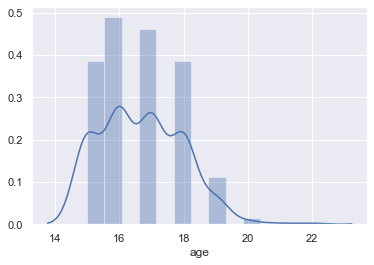

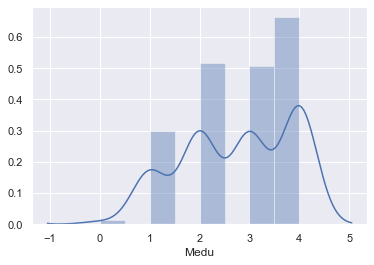

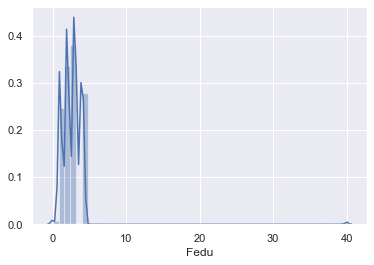

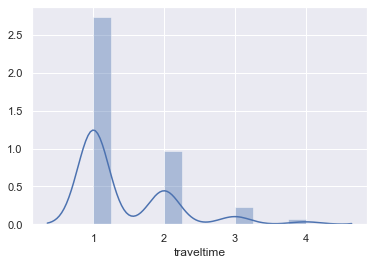

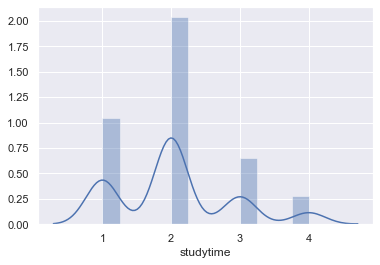

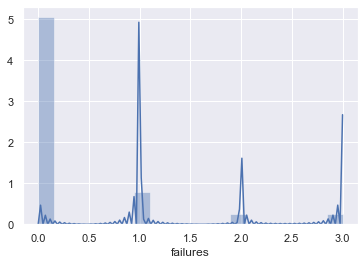

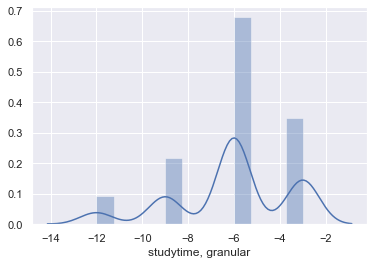

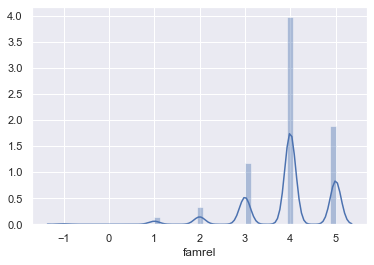

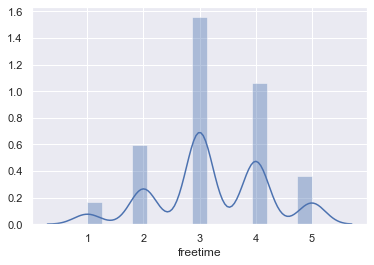

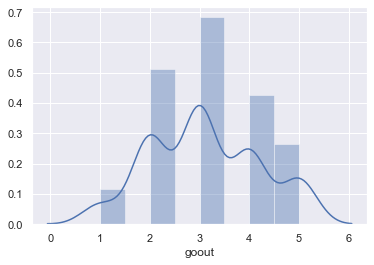

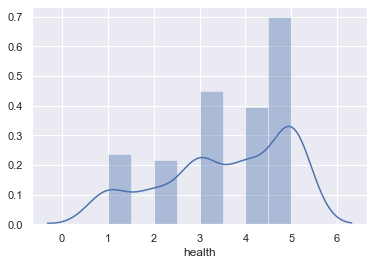

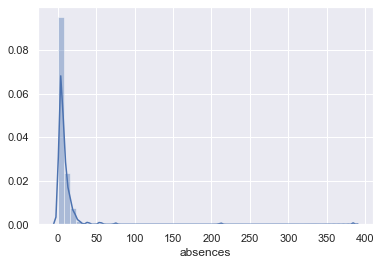

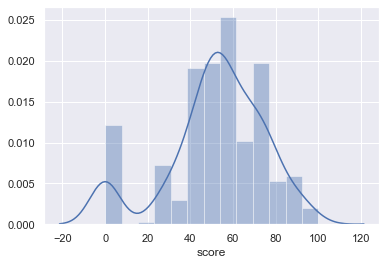

In [9]:
for value in numeric_data:
    histogram(data_fin[value])

Переменная 'Fedu' имеет один выброс со значением "40", что с большой долей вероятности является опечаткой. Заменим это значение на "4".

In [10]:
data_fin['Fedu'].value_counts()

3.0     120
2.0     106
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [11]:
data_fin['Fedu'] = data_fin['Fedu'].replace(40, 4)

Переменная 'famrel' имеет одно значение "-1", выходящее за рамки установленного диапазона (1 - 5). Можно сделать предположение о субъективной оценке семейных отношений как очень плохих, либо "минус" попал как опечатка. Заменим это значение на "1". 

In [12]:
data_fin['famrel'].value_counts()

 4.0    209
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [13]:
data_fin['famrel'] = data_fin['famrel'].replace(-1, 1)

Переменная 'absences'. Основное распределение лежит в диапазоне (0-20). Количество значений больше 20 - 17, больше 30 - 7. Однако, ученик с максимальным значением переменной сдал экзамен хорошо и имеет хорошее здоровье. Остальные выбросы совпадают со средним уровнем оценок за экзамен. Таким образом, данная переменная не имеет влияние на целевой параметр. Не будем включать её в итоговый датафрейм.

In [14]:
len(data[data.absences > 20]), len(data[data.absences > 30])

(17, 7)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Правая граница выбросов: [20.0].


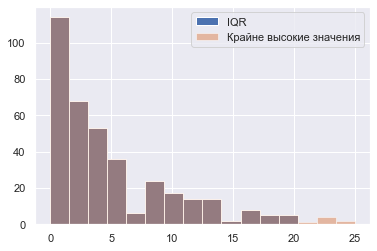

In [15]:
median = data.absences.median()
perc25 = data.absences.quantile(0.25)
perc75 = data.absences.quantile(0.75)
IQR = perc75 - perc25
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Правая граница выбросов: [{l}].".format(l=perc75 + 1.5*IQR))
data.absences.loc[data.absences.between(perc25 - 1.5*IQR, 
                                        perc75 + 1.5*IQR)].hist(bins = 16
                                                                , range = (0, 25)
                                                                , label = 'IQR')
data.absences.loc[data.absences <= 25].hist(alpha = 0.5
                                            , bins = 16
                                            , range = (0, 25)
                                            , label = 'Крайне высокие значения')
plt.legend();

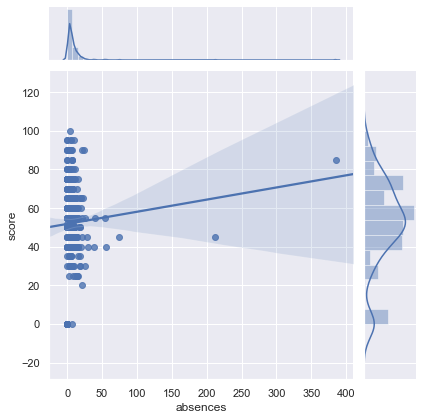

In [16]:
sns.jointplot(data_fin['absences'], data_fin['score'], data=data_fin, kind = 'reg');

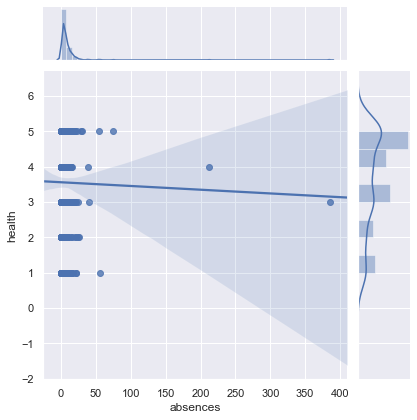

In [17]:
sns.jointplot(data_fin['absences'], data_fin['health'], data=data_fin, kind = 'reg');

Переменная 'score' распределена нормально в диапазоне (20 - 100) с шагом в 5 едениц. Наблюдается неестественно высокое значение нулевых значений (9,4%). Предположительно такая оценка была устанавливена ученикам не сдавшим работу, либо отсутствовавшим на экзамене. Определить потенциальную оценку невозможно, поэтому данные строки удаляются из итоговой таблицы.

In [18]:
data['score'].value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [19]:
data_fin = data_fin.query('score != 0')

# 

Анализ строковых переменных.

In [20]:
def countplot(x_data, df):
    f, ax = plt.subplots()
    ax = sns.countplot(x=x_data, data=df)

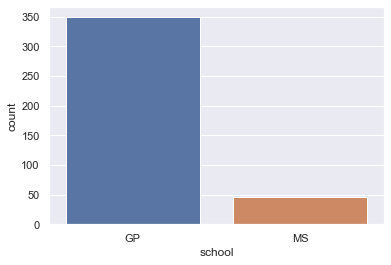

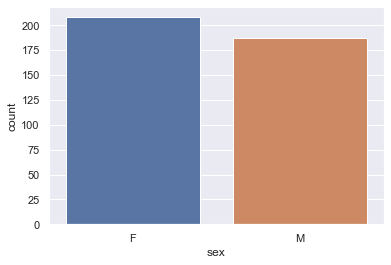

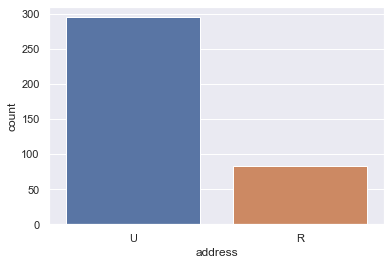

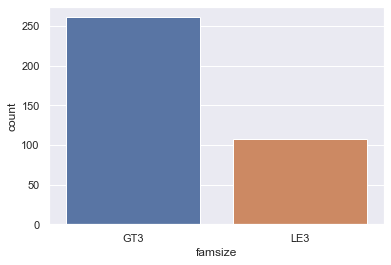

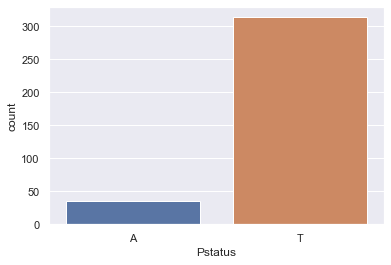

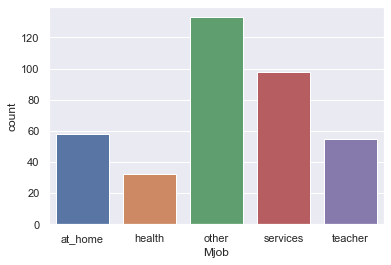

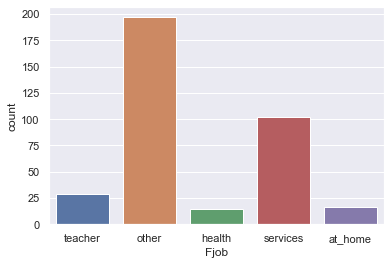

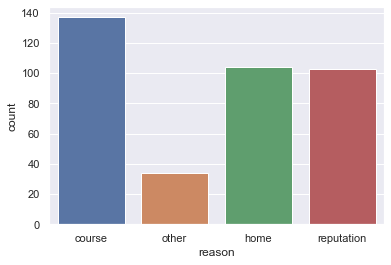

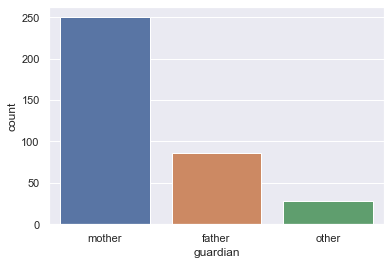

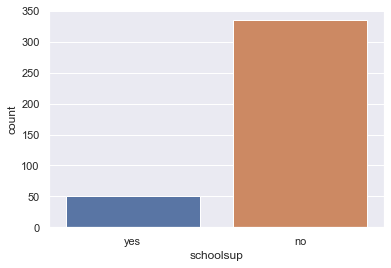

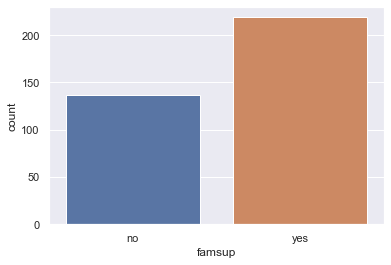

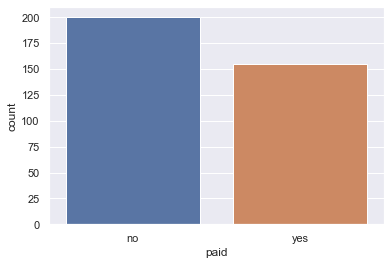

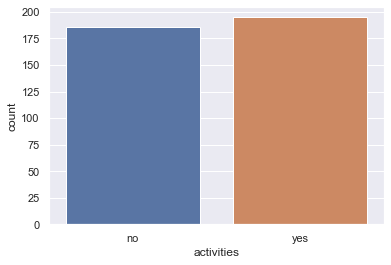

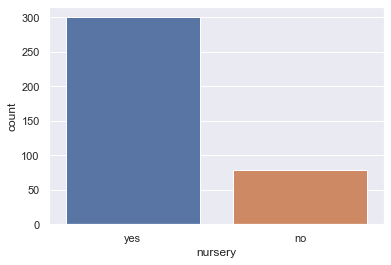

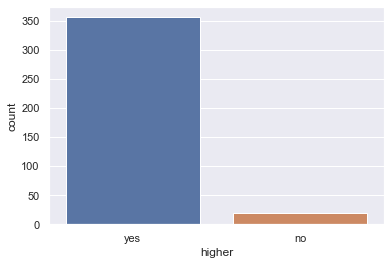

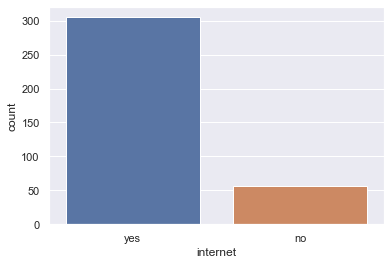

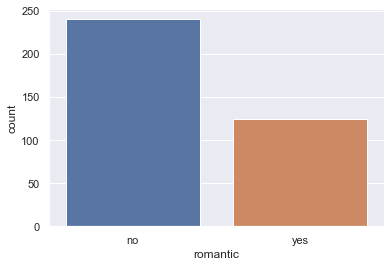

In [21]:
for value in character_data:
    countplot(value, character_data)

По полу ученики распределены примерно поровну.
Основная выборка дана по школе GP, но и выборка школы MS > 30, а значит пригодна для статистического анализа.
Основная часть учеников - городские жители, что дает основание предполагать, что школа MS находится в пригороде, а GP - в городе.
2/3 учеников проживают в семьях до 3-х человек.
Около 90% учеников проживает в полных семьях.
Около 85% учеников не получают дополнительной образовательной поддержки.
БОльшая часть учеников посещали детский сад.
Основная масса учеников планирует дальнейшее получение высшего образования.
Предварительный анализ остальных перемнных пока ни о чем не говорит.

In [22]:
for i in categorical_data:
    print(i, data[i].nunique())

guardian 3
schoolsup 2
paid 2
health 5
goout 5
internet 2
romantic 2
nursery 2
traveltime 4
freetime 5
Pstatus 2
Mjob 5
activities 2
famrel 6
sex 2
Fedu 6
famsize 2
studytime 4
Medu 5
famsup 2
higher 2
reason 4
address 2
Fjob 5
school 2


# 

Корелляционный анализ

In [23]:
def boxplot(x_data, y_data, data):
    sns.set(style="ticks", palette="pastel")
    f, axes = plt.subplots()
    sns.boxplot(x=x_data, y=y_data, palette=['m', 'g'], data = data)
    sns.despine(offset=10, trim=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot inte

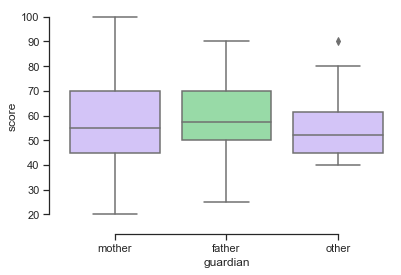

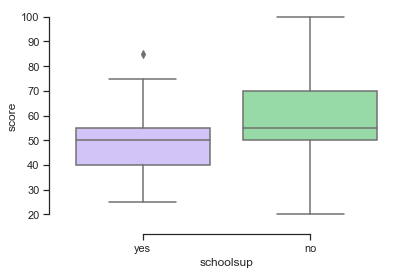

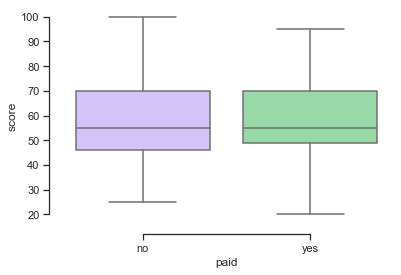

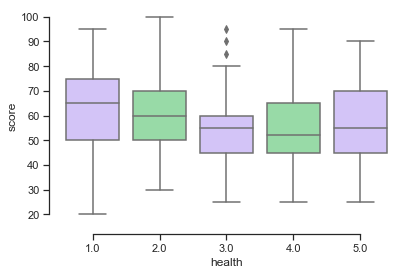

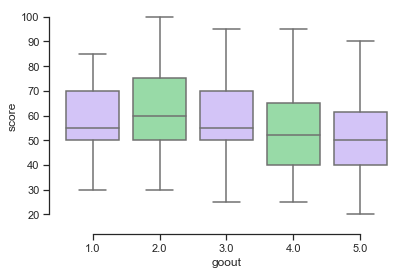

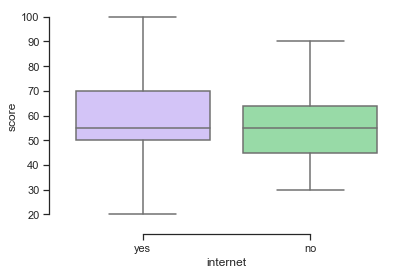

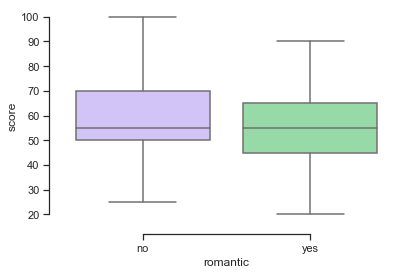

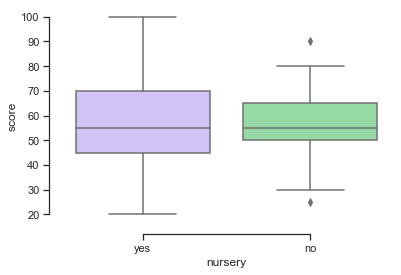

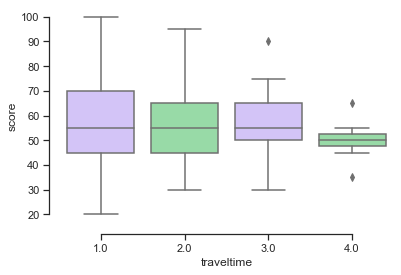

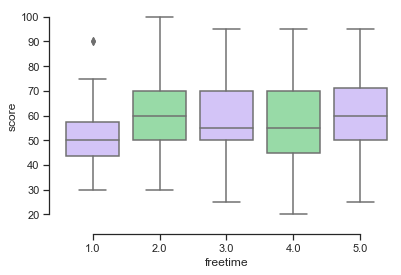

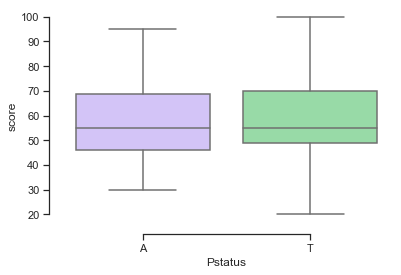

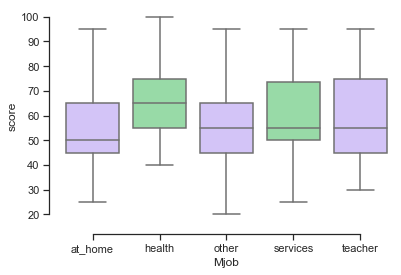

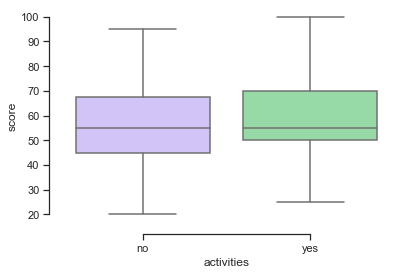

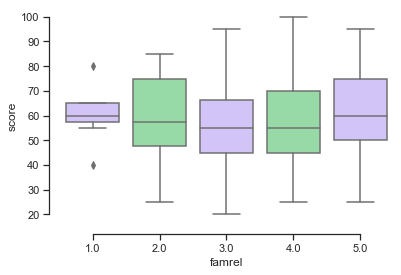

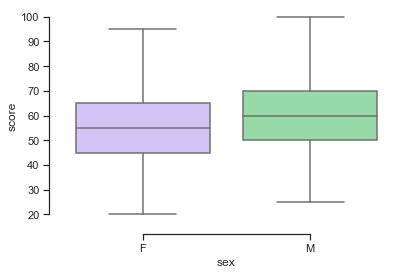

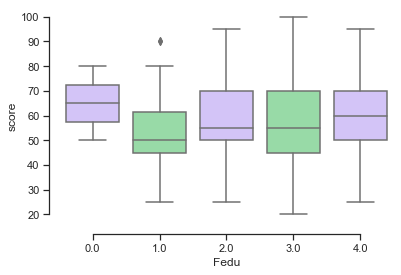

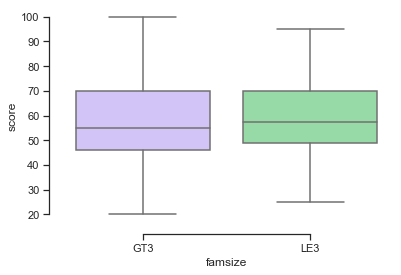

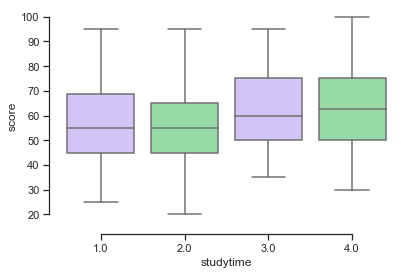

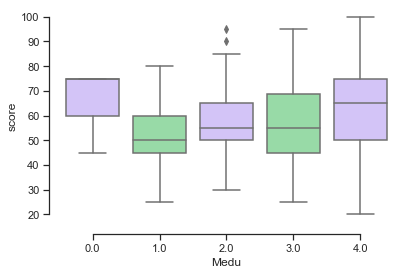

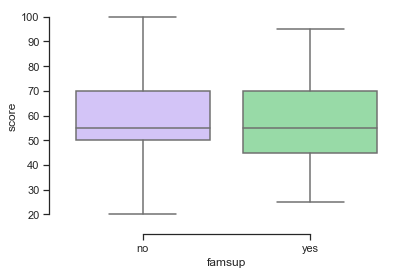

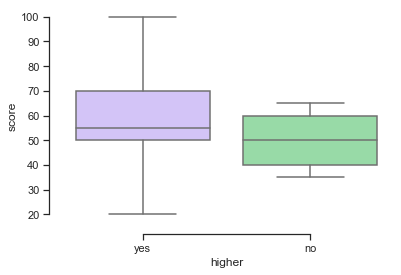

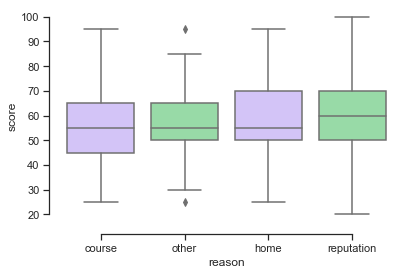

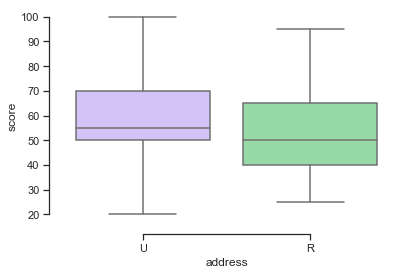

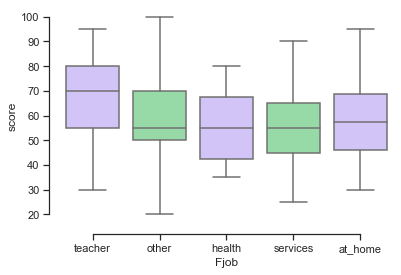

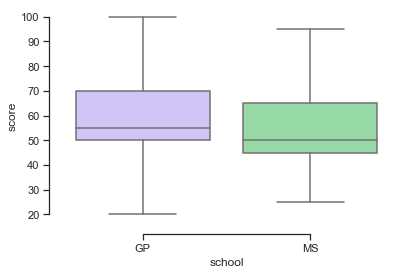

In [24]:
for value in categorical_data:
    boxplot(data_fin[value], data_fin['score'], data_fin)

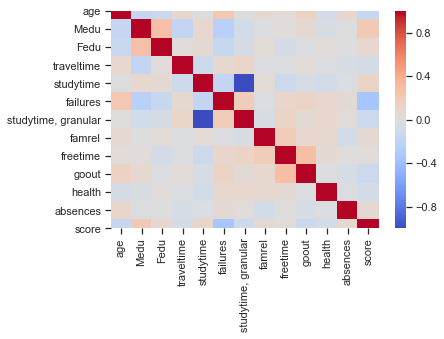

In [25]:
correlation = data.corr()
sns.heatmap(correlation, cmap = 'coolwarm');

In [26]:
correlation = data.corr()
display(correlation)

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


Для целей настоящего корелляционного анализа были определены уровни корелляции: 0,1 - 0,3 (средняя), 0,3 - 0,6 (выше средней), > 0,6 (сильная).
С успеваемостью ('score') кореллируют такие переменные как:
- 'Medu' - среднеположительно;
- 'age' - среднеотрицательно;
- 'studytime' среднеположительно;
- 'failures' выше среднего отрицательно;
- 'freetime' среднеотрицательно.
Также переменная 'studytime, granular' имеет полную отрицательную корелляцию с переменной 'studytime', а именно показатель 'studytime' умноженный на 3 со знаком минус. Удалим данный столбец.

In [27]:
data_fin.drop('studytime, granular', axis='columns', inplace=True)

Тест Стьюдента.

In [28]:
def get_stat_dif(column):
    cols = data_fin.loc[:, column].value_counts().index[:10] # Список значений столбцов, максимальное количество - 10
    combinations_all = list(combinations(cols, 2)) # Список возможных комбинаций из 2-х чисел, т.к. тест Стьюдента производится для двух
    for comb in combinations_all: # Поочередно для каждой комбинации значений проводим t-тест
        if ttest_ind(data_fin.loc[data_fin.loc[:, column] == comb[0], 'score'], 
                        data_fin.loc[data_fin.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
# Т.о. если значение p-value < 0.05, деленного на кол-во комбинаций, 
# то можно констатировать наличие статистически значимых различий 
# для значений в колонке

In [29]:
for col in categorical_data:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Fjob


Тест Стьюдента проведен на 5% уровне значимости и показал статистически значимые различия по переменным:
- 'Medu' и 'Mjob'. Уровни образования и профессия матери имеют большое влияние на успеваемость детей, т.к. матери больше отцов уделяют времени их воспитанию. Также уровни образования матери и отца имеют высокую корелляцию. Удалим переменные Fjob и Fedu из итогового датафрейма;
- 'higher'. Стремление детей получить высшее образование может говорить об их мотивации учиться лучше. Но большой разброс оценок и большая доля положительных ответов свидетельствует об амбициозности утверждений учеников, не подкрепленных соответствующими знаниями. Оставляем в итоговом датафрейме с оговоркой о том, что выборка отрицательно ответивших мала (< 30).
- 'address'. Судя по всему школа GP расположена в городе, а MS в пригороде. Соответственно 'traveltime' в среднем больше у последней. Но пристутсвует ряд загородных учеников, которые посещают городскую школу. Возможно на уровень успеваемости зависит от свободного времени, высвобождаемого из-за посещения школы в непосредственной близоста к дому, но переменная 'traveltime' слабо кореллирует со свободным временем и временем на дополнительные занятия. Скорее всего дело в уровне образования матерей, который выше в городе;
- 'romantic'. Романтические отношения по причинам нехватки времени на учебу, вероятно, плохо сказываются на успеваемости.

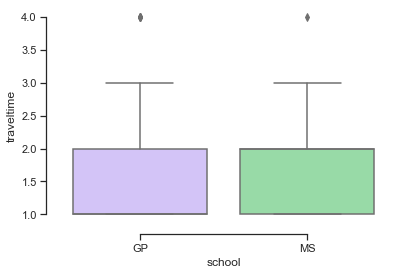

In [30]:
boxplot(data_fin['school'], data_fin['traveltime'], data_fin)

In [31]:
data_fin.groupby(['school'])['traveltime'].median()

school
GP    1.0
MS    2.0
Name: traveltime, dtype: float64

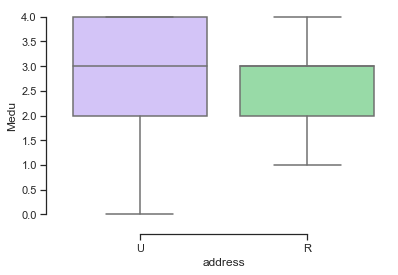

In [32]:
boxplot(data_fin['address'], data_fin['Medu'], data_fin)

In [33]:
data_fin.groupby(['address'])['Medu'].median()

address
R    3.0
U    3.0
Name: Medu, dtype: float64

Итоги.
Исходный набор данных хорошего качества, имеет малое количество пустых значений и выбросов.
Для построения модели оставляем следующие столбцы: 'age', 'address', 'Mjob', 'Medu', 'studytime', 'failures', 'freetime', 'higher', 'romantic', 'score'.
Произведена замена пустых значений на медианное или наиболее распространенное.
Исключены данные учеников имеющих оценку '0' на экзамене.
Отмечены гипотезы:
1. Возраст ученика, отличающийся от среднего в большую сторону негативно влияет на успеваемость.
2. Уровень образования матери положительно кореллирует с успеваемостью.
3. Родители городских учеников имеют более высокий уровень образования.
4. Время, уделяемое учебе помимо школы, положительно влияет на успеваемость.
5. Число внеучебных неудач отрицательно сказывается на успеваемости.
6. Романтические отношения отрицательно сказываются на успеваемости.
7. Стремление получить высшее образование положительно сказывается на успеваемости.

In [34]:
data_fin = data_fin[['age', 'address', 'Mjob', 'Medu', 'studytime', 'failures', 'freetime', 'higher', 'romantic', 'score']]
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 394
Data columns (total 10 columns):
age          358 non-null int64
address      358 non-null object
Mjob         358 non-null object
Medu         358 non-null float64
studytime    358 non-null float64
failures     358 non-null float64
freetime     358 non-null float64
higher       358 non-null object
romantic     358 non-null object
score        358 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 33.2+ KB
